## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

    Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
    Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

    средний удой за год — не менее 6000 килограммов;
    молоко должно быть вкусным.

In [1]:
import pandas as pd
import phik
from phik import resources, report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
pip install phik==0.10.0

Note: you may need to restart the kernel to use updated packages.


## Описание данных

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 

Описание данных:

        id — уникальный идентификатор коровы.
        Удой, кг — масса молока, которую корова даёт в год (в килограммах).
        ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
        Сырой протеин, г — содержание сырого протеина в корме (в граммах).
        СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
        Порода — порода коровы.
        Тип пастбища — ландшафт лугов, на которых паслась корова.
        порода папы_быка — порода папы коровы.
        Жирность,% — содержание жиров в молоке (в процентах).
        Белок,% — содержание белков в молоке (в процентах).
        Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
        Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
        
        
Признаки в датасете ferma_main.csv можно разделить на группы.

        Характеристики коровы: id, Порода, порода папы_быка, Возраст.
        Характеристики корма: ЭКЕ (Энергетическая кормовая единица),Сырой протеин,г,СПО(Сахаро-протеиновое
        соотношение).
        Характеристика пастбища: Тип пастбища.
        Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
        
        
Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 

Описание данных:

        id — уникальный идентификатор коровы.
        Имя Папы — имя папы коровы.
        
       
Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

Описание данных:

        Порода — порода коровы.
        Тип пастбища — ландшафт лугов, на которых паслась корова.
        порода папы_быка — порода папы коровы.
        Имя_папы — имя папы коровы.
        Текущая_жирность,% — содержание жиров в молоке (в процентах).
        Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
        Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

In [3]:
data_cow = pd.read_csv('datasets/cow_buy.csv', sep=';')
data_dad = pd.read_csv('datasets/ferma_dad.csv', sep=';')
data_main = pd.read_csv('datasets/ferma_main.csv', sep=';')

##  Предобработка данных

In [4]:
display(data_cow)
display(data_dad)
display(data_main)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


Для начала расмотрим таблицу ferma_main на наличие дубликатов, пропусков и соответсвие типов в столбцах.

In [5]:
display(data_main.isna().sum())
display(data_main.duplicated().sum())
display(data_main.info())

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

np.int64(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

Пропусков нет, но видим 5 дубликатов. Также столбцы 'ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%' строкового типа данных. Заменим запятую на точку и переведем их к типу float.

In [6]:
data_main = data_main.drop_duplicates()
data_main.reset_index(drop=True)
sp = ['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']
data_main[sp] = data_main[sp].apply(lambda x: x.str.replace(',', '.').astype('float'))

Ту же проблему видим в таблице cow_buy

In [7]:
sp = ['Текущая_жирность,%', 'Текущий_уровень_белок,%']
data_cow[sp] = data_cow[sp].apply(lambda x: x.str.replace(',', '.').astype('float'))

In [8]:
data_cow = data_cow.drop_duplicates()
data_cow.reset_index(drop=True)
data_cow

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


Для обучения модели могут понадобится и бинарные значения, переведем все нужные столбцы в бинарный вид:

In [9]:
dt = {'порода папы_быка': {1:'Айдиал', 0:'Соверин'}, 'Тип пастбища': {1:'Равнинное', 0:'Холмистое'}, 'Порода': {1:'Вис Бик Айдиал', 0:'РефлешнСоверинг'},
      'Вкус молока': {1:'вкусно', 0:'не вкусно'}, 'Возраст': {1:'более_2_лет', 0:'менее_2_лет'}}
data_main['порода папы_быка'].unique()
data_main['Тип пастбища'] = np.where(data_main['Тип пастбища'] == 'Равнинные', 'Равнинное', data_main['Тип пастбища'])
data_main['порода папы_быка'] = np.where(data_main['порода папы_быка'] == 'Айдиал', 'Айдиалл', data_main['порода папы_быка'])
#data_main['Вкус молока'] = np.where(data_main['Вкус молока'] == "вкусно", 1, 0)
#data_main['Возраст'] = np.where(data_main['Возраст'] == "более_2_лет", 1, 0)
#data_main['Порода'] = np.where(data_main['Порода'] == "Вис Бик Айдиал", 1, 0)

for i in data_main.columns:
  print(end='\n\n')
  display(data_main[i].describe())
data_main

count    629.00000
mean     315.00000
std      181.72094
min        1.00000
25%      158.00000
50%      315.00000
75%      472.00000
max      629.00000
Name: id, dtype: float64

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: Удой, кг, dtype: float64

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: ЭКЕ (Энергетическая кормовая единица), dtype: float64

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: Сырой протеин, г, dtype: float64

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: СПО (Сахаро-протеиновое соотношение), dtype: float64

count                629
unique                 2
top       Вис Бик Айдиал
freq                 373
Name: Порода, dtype: object

count           629
unique            2
top       Холмистое
freq            351
Name: Тип пастбища, dtype: object

count         629
unique          2
top       Айдиалл
freq          318
Name: порода папы_быка, dtype: object

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: Жирность,%, dtype: float64

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: Белок,%, dtype: float64

count        629
unique         2
top       вкусно
freq         371
Name: Вкус молока, dtype: object

count             629
unique              2
top       более_2_лет
freq              519
Name: Возраст, dtype: object

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиалл,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


Дополнительно создал словарь для хранения замененых значений.

Создадим копию основного датафрейма(без id) и разделим на количественные и категориальные данные

In [10]:
t = data_main.copy()
t = t.iloc[:, 1:]

num_col = t[['Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г',
            'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']]
cat_col = t[['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст']]
num_col = num_col[num_col['Удой, кг'] < 8000]
t = t[t['Удой, кг'] < 8000]


Также удалим явные выбросы в столбце с Удоем, логически не объяснить 1 аномальное значение, просто удалим его.

## Исследовательский анализ данных

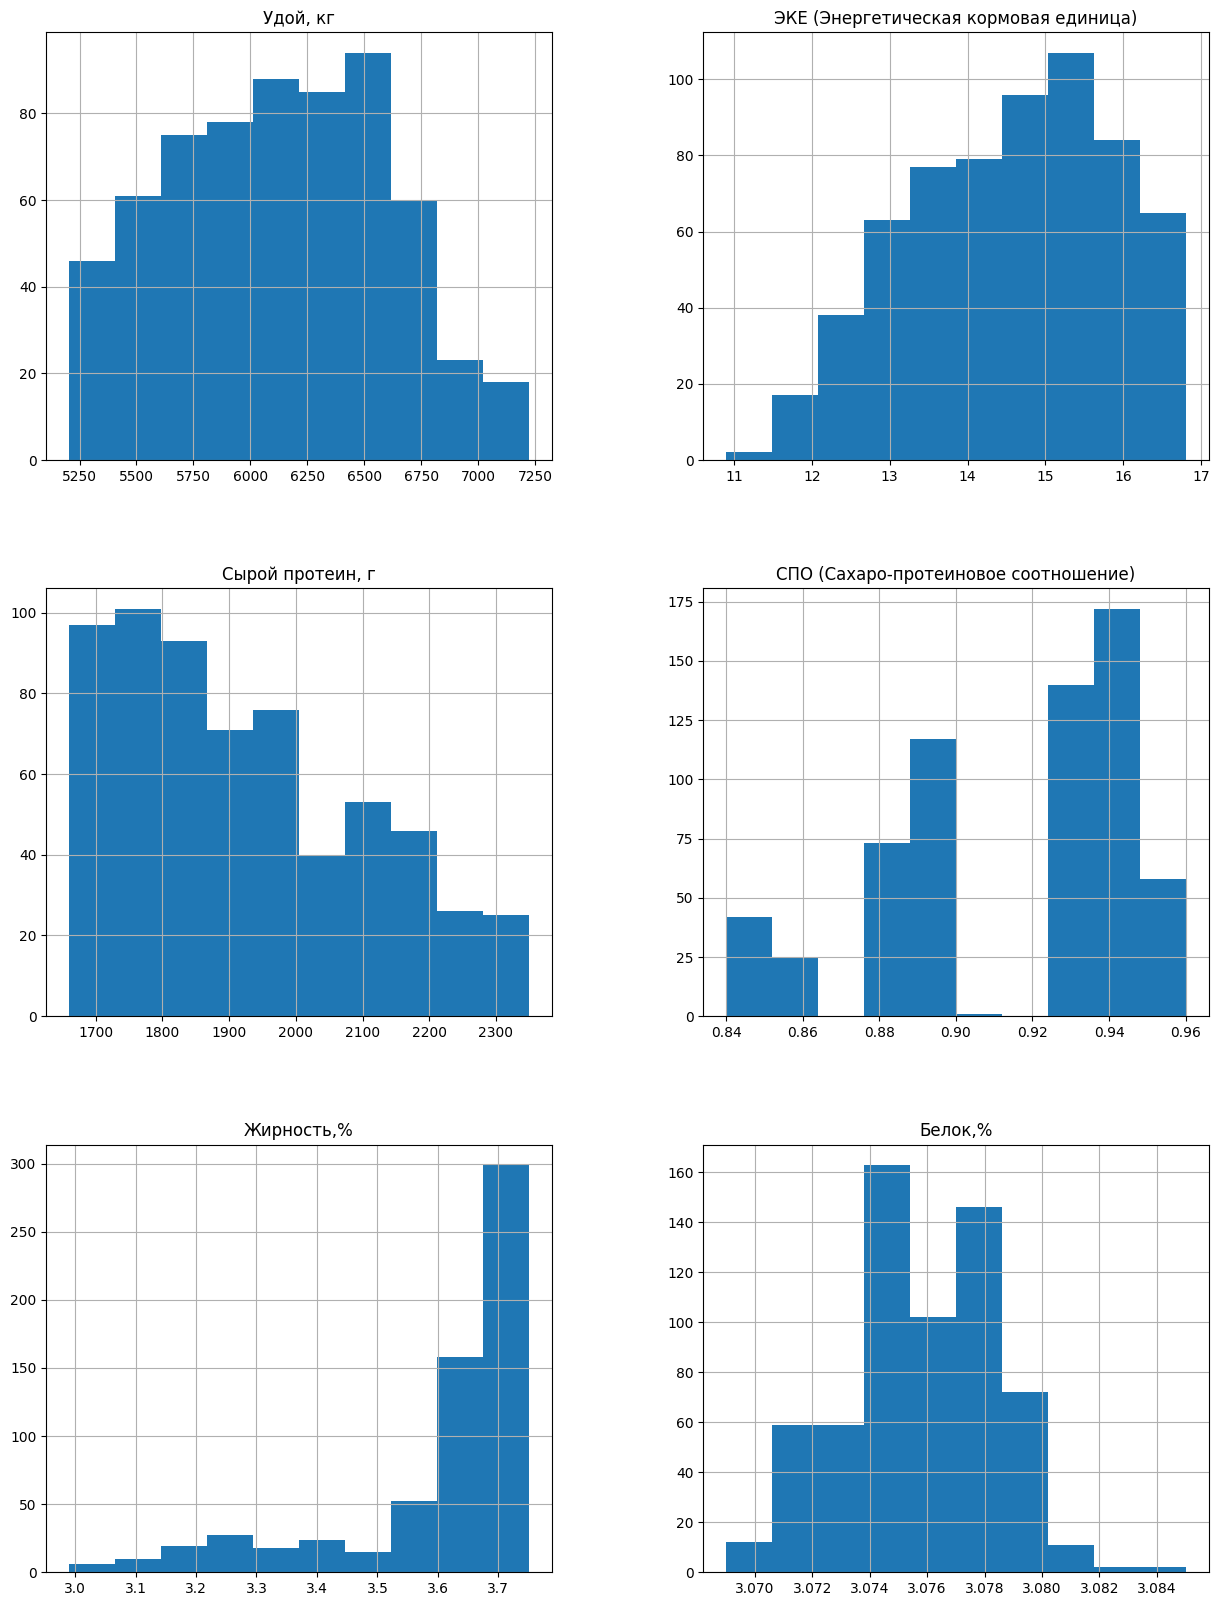

In [11]:
num_col.hist(figsize=(15,20))
plt.show()

Рассмотрев графики, видим распределение близкое к нормальному у столбцов с Удоем,Белка, ЭКЕ.

На графике 'СПО (Сахаро-протеиновое соотношение)' несколько пиковых значений с 0.84-0.86, 0.88-0.9, 0.925-0.96. Видим обртаную зависимость с графиком протеина.

График Жирности похож на экспоненциальное распределение, где основные значения расположены в промежутке с ~3.6-3.72.

{1: 'Вис Бик Айдиал', 0: 'РефлешнСоверинг'}

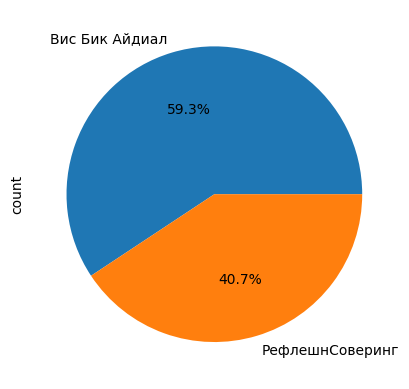

In [12]:
cat_col['Порода'].value_counts().plot(kind='pie', autopct='%1.1f%%')
dt['Порода']

Коров с породой Вис Бик Айдиал незначительно больше, чем РефлешнСоверинг. 60/40 соответсвенно

In [13]:
cat_col.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст'], dtype='object')

{1: 'Равнинное', 0: 'Холмистое'}

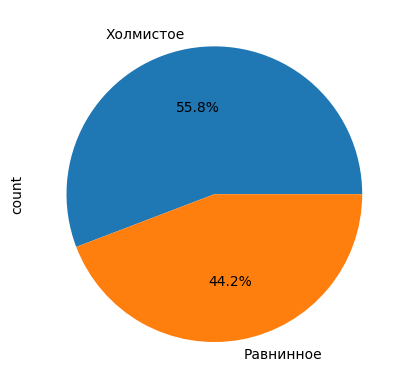

In [14]:
cat_col['Тип пастбища'].value_counts().plot(kind='pie', autopct='%1.1f%%')
dt['Тип пастбища']

Видим что подавляющее число пастбищ являются равнинными. около 96%

{1: 'Айдиал', 0: 'Соверин'}

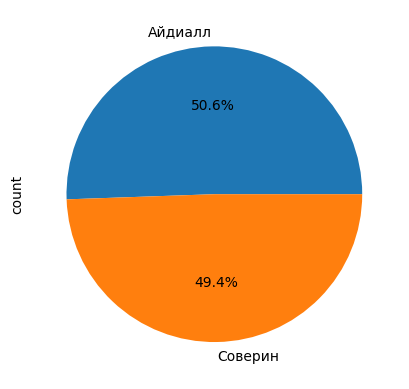

In [15]:
cat_col['порода папы_быка'].value_counts().plot(kind='pie', autopct='%1.1f%%')
dt['порода папы_быка']

Ситуация отличается от "Породы", Около 87% быков породы Соверин.

{1: 'вкусно', 0: 'не вкусно'}

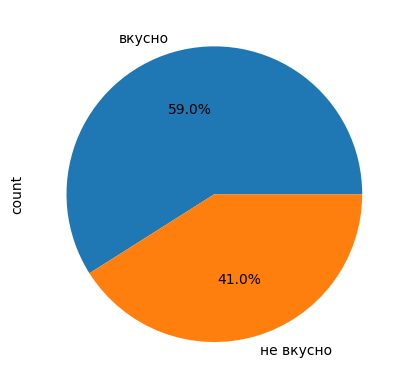

In [16]:
cat_col['Вкус молока'].value_counts().plot(kind='pie', autopct='%1.1f%%')
dt['Вкус молока']

Количество коров с вкусным и не вкусным молоком примерно одинакого. К счастью,коров со вкусным молоком на 10% больше.

{1: 'более_2_лет', 0: 'менее_2_лет'}

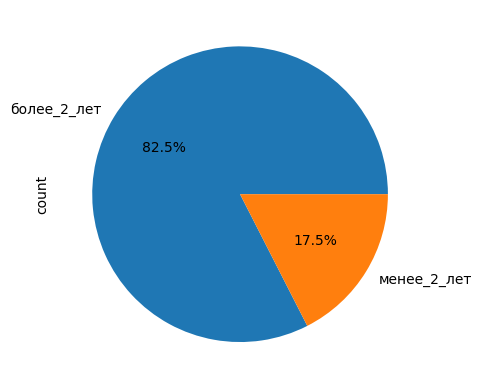

In [17]:
cat_col['Возраст'].value_counts().plot(kind='pie', autopct='%1.1f%%')
dt['Возраст']

Больше всего коров старше 2 лет, при условии что коровы в среднем живут 20 лет, значит молодняка ~17%.

## Корреляционный анализ

Построим первичную матрицу корреляции между всеми признаками:

In [18]:
t.columns
#[['Порода', 'Тип пастбища','порода папы_быка','Вкус молока', 'Возраст']]

Index(['Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г',
       'СПО (Сахаро-протеиновое соотношение)', 'Порода', 'Тип пастбища',
       'порода папы_быка', 'Жирность,%', 'Белок,%', 'Вкус молока', 'Возраст'],
      dtype='object')

Так как Корреляция Пирсона не подходит для категорияльных данных воспользуемся Phik

C:\Users\artem\PycharmProjects\prac_projects\venv\lib\site-packages\phik\phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


<Axes: >

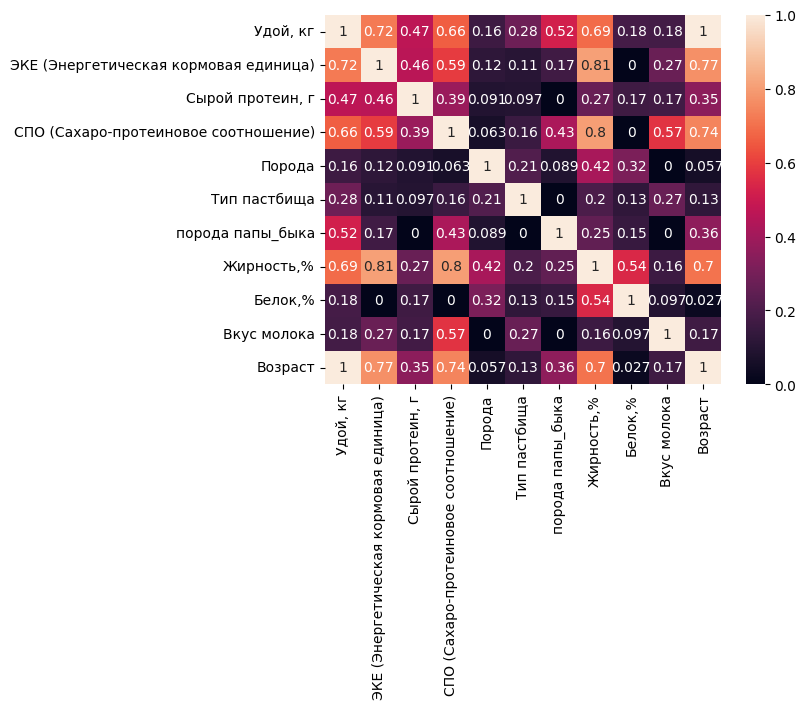

In [19]:
a = t.phik_matrix(interval_cols=['Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)'])
sns.heatmap(a,annot=True)

Выведем диаграммы расеяния для каждого количественного признака и целевого:

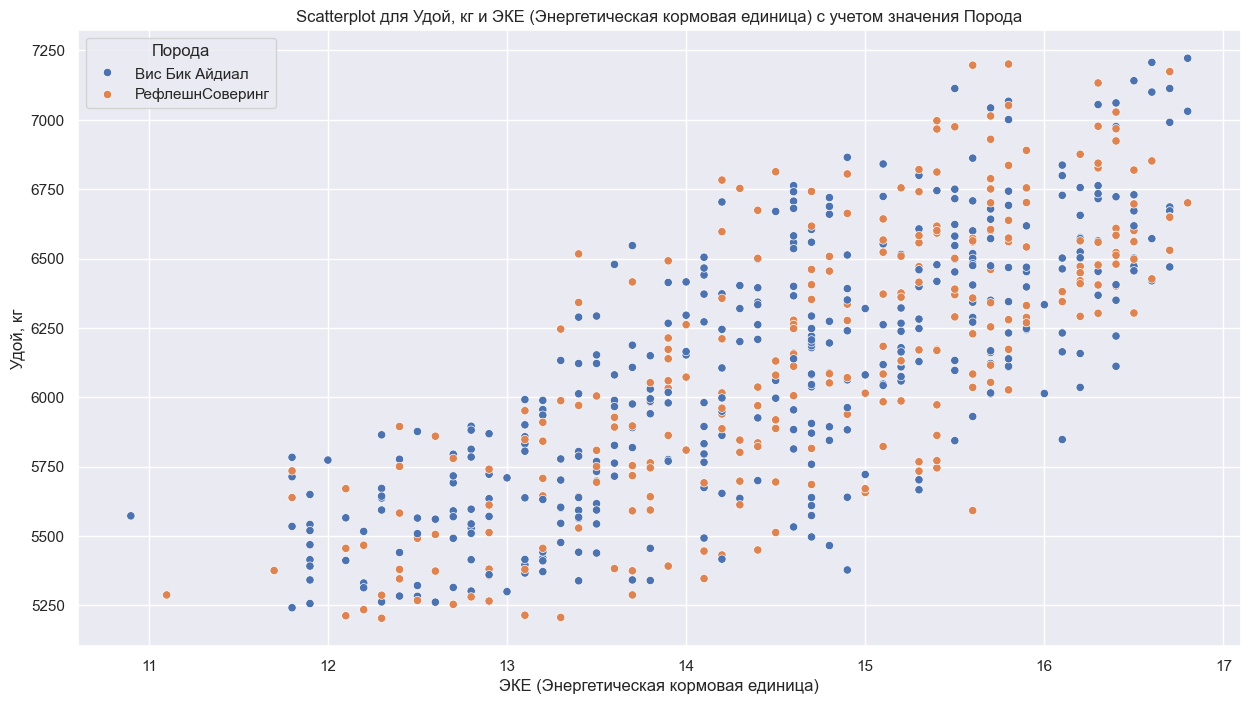

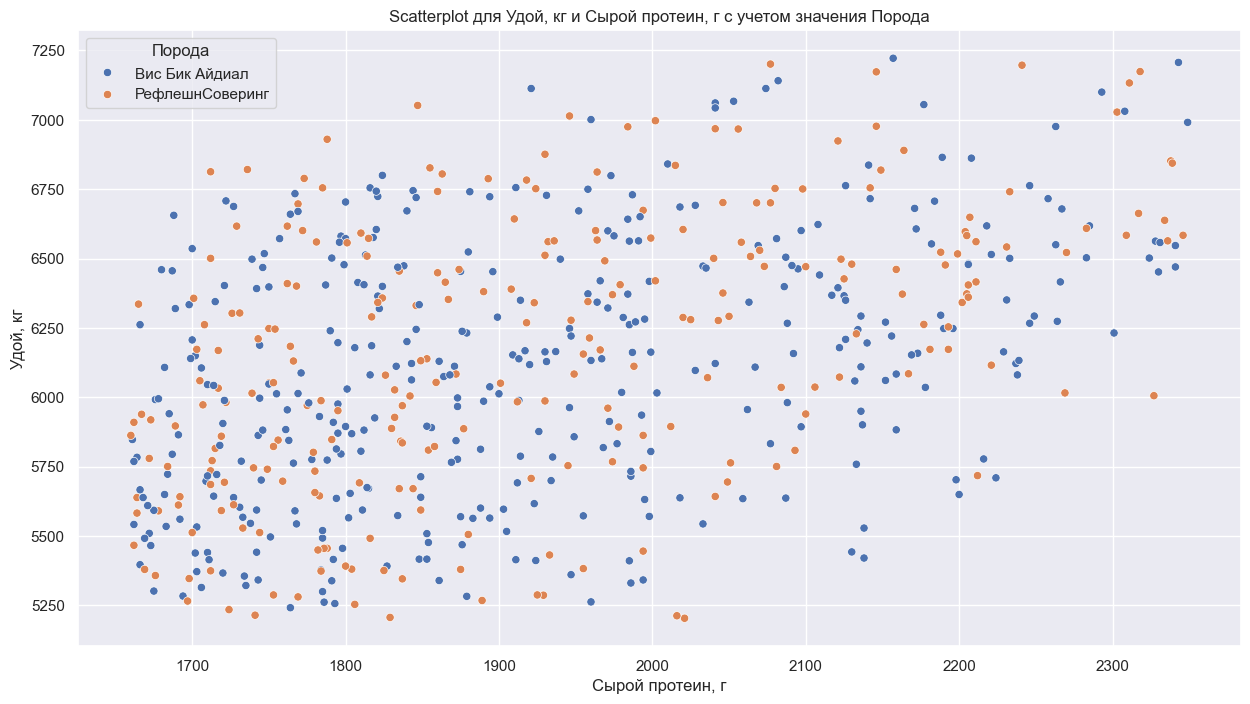

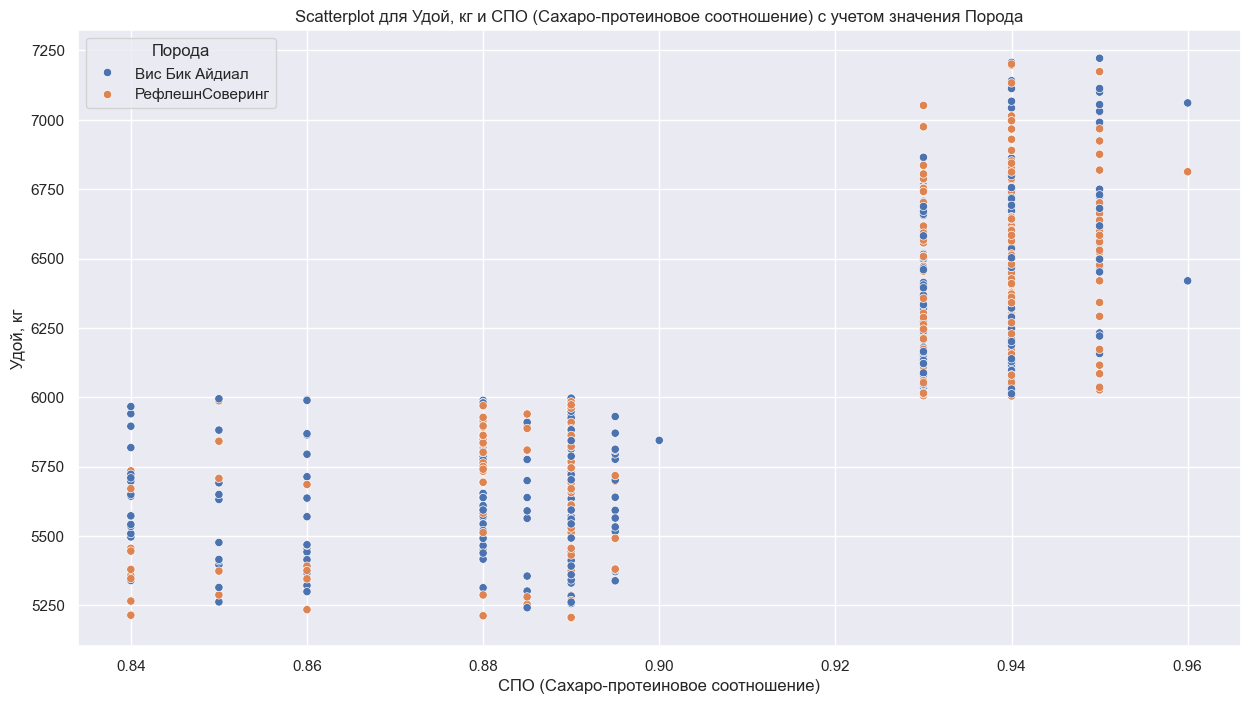

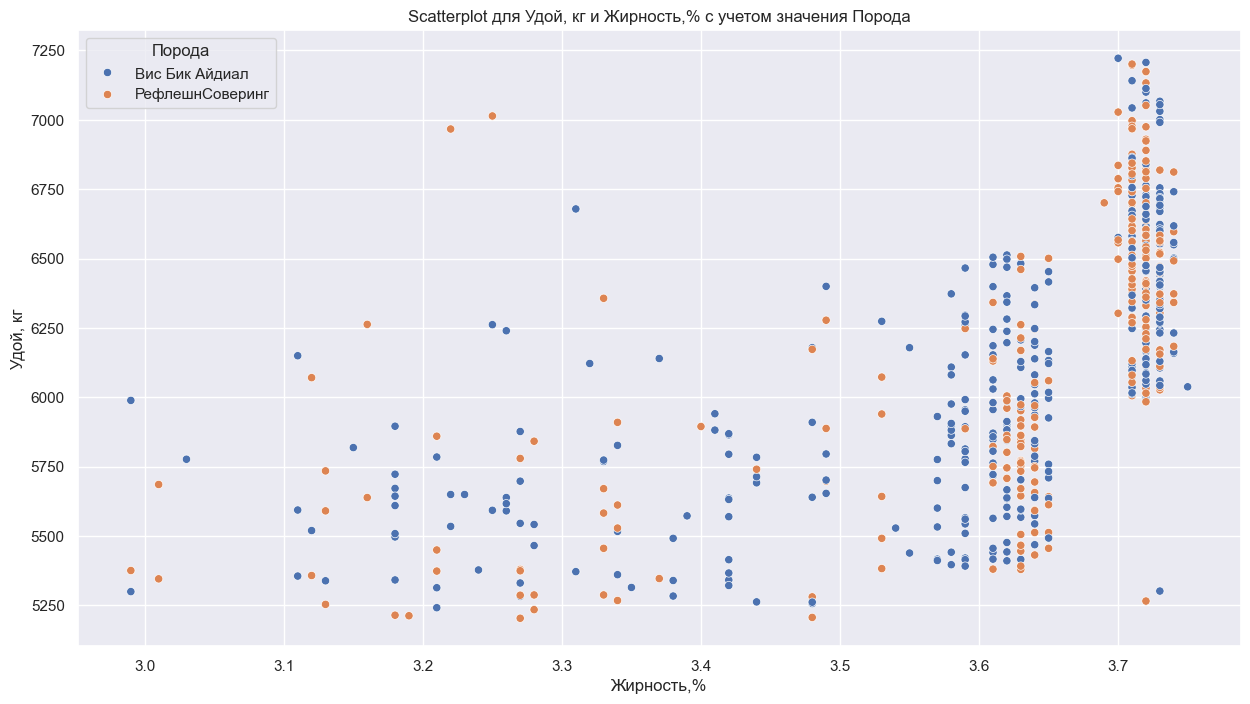

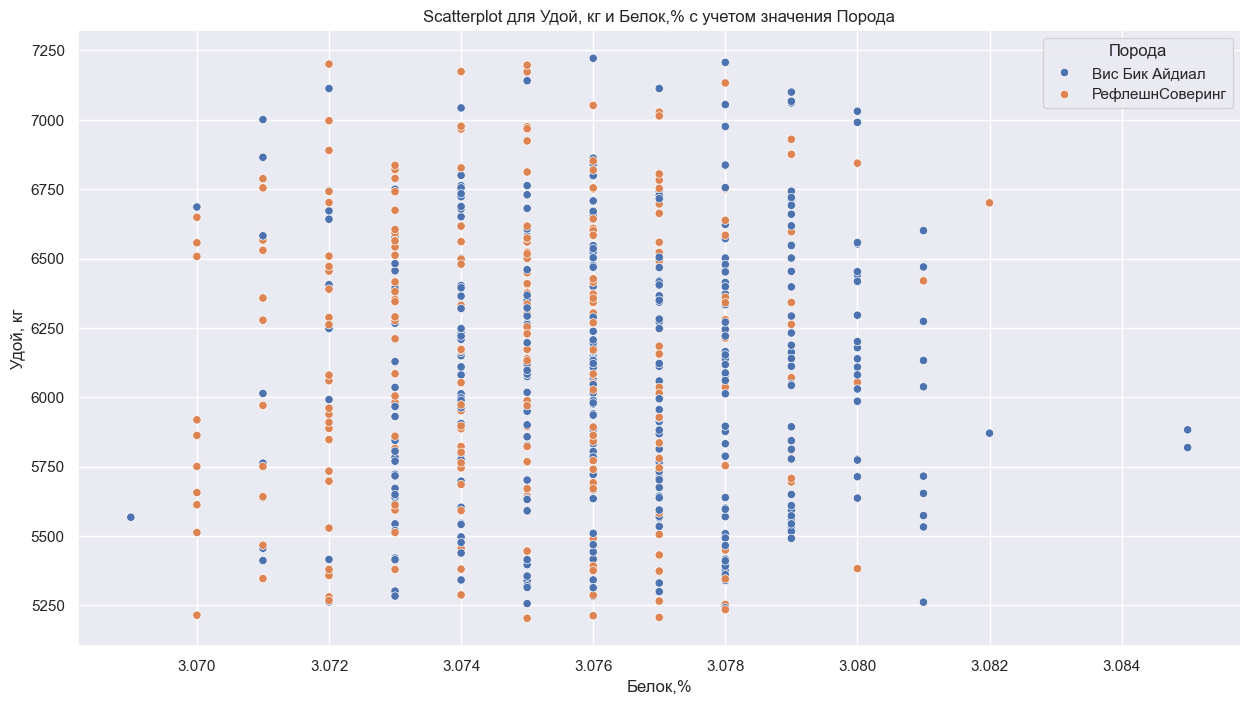

In [20]:
categorical_feature = 'Порода'
quantitative_features = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г',
                         'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']
quantitative_features = list(quantitative_features)


for feature in quantitative_features:
    sns.set(rc={"figure.figsize": (15, 8)})
    plt.title(f'Scatterplot для Удой, кг и {feature} с учетом значения {categorical_feature}')
    sns.scatterplot(data=t, x=feature, y='Удой, кг', hue=categorical_feature)
    plt.xlabel(feature)
    plt.ylabel('Удой, кг')
    plt.legend(title=categorical_feature)
    
    plt.show()

Видим, что целевой признак коррелирует со всеми количественными, за исключением Белка.Корреляция в среднем средняя/сильная и явно прослеживается. Порода незначительно влияет на корреляцию между данными.

Заметна мультиколлинеарность между всеми признаками молока. В любом случае мы их берем для обучения модели. 

Нелинейных связей не обнаружено

## Обучение модели линейной регрессии

In [21]:
#train_data = t[['Удой, кг', 'Жирность,%', 'Возраст', 'ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']]
display(t)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,вкусно,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...
624,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиалл,3.74,3.075,не вкусно,более_2_лет
625,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


In [22]:
RANDOM_STATE = 42

In [23]:
train_data = t
X = train_data.drop('Удой, кг', axis=1)
y = train_data['Удой, кг']



In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
display(X_train)

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
508,16.5,2123,0.940,РефлешнСоверинг,Холмистое,Соверин,3.70,3.074,вкусно,более_2_лет
383,12.5,1889,0.890,РефлешнСоверинг,Холмистое,Соверин,3.34,3.072,вкусно,менее_2_лет
587,14.7,1671,0.880,Вис Бик Айдиал,Равнинное,Айдиалл,3.18,3.079,не вкусно,более_2_лет
197,14.4,2063,0.940,Вис Бик Айдиал,Холмистое,Айдиалл,3.62,3.079,вкусно,более_2_лет
328,13.1,2077,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.64,3.076,вкусно,более_2_лет
...,...,...,...,...,...,...,...,...,...,...
72,13.7,2212,0.895,РефлешнСоверинг,Холмистое,Айдиалл,3.61,3.077,вкусно,более_2_лет
107,14.9,1742,0.930,Вис Бик Айдиал,Равнинное,Айдиалл,3.72,3.073,вкусно,более_2_лет
271,13.4,1775,0.880,РефлешнСоверинг,Равнинное,Айдиалл,3.63,3.071,вкусно,более_2_лет
436,13.1,1949,0.880,Вис Бик Айдиал,Равнинное,Айдиалл,3.61,3.075,не вкусно,более_2_лет


In [25]:
num_col_names= X_train.drop(['Возраст','Порода', 'порода папы_быка', 'Тип пастбища', 'Вкус молока'],  axis=1).columns

cat_col_names = ['Возраст','Порода', 'порода папы_быка', 'Тип пастбища', 'Вкус молока']


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])


encoder = OneHotEncoder(drop='first')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names =  encoder.get_feature_names_out()

In [26]:

X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


print(X_train.head(5))

   Возраст_менее_2_лет  Порода_РефлешнСоверинг  порода папы_быка_Соверин  \
0                  0.0                     1.0                       1.0   
1                  1.0                     1.0                       1.0   
2                  0.0                     0.0                       0.0   
3                  0.0                     0.0                       0.0   
4                  0.0                     0.0                       0.0   

   Тип пастбища_Холмистое  Вкус молока_не вкусно  \
0                     1.0                    0.0   
1                     1.0                    0.0   
2                     0.0                    1.0   
3                     1.0                    0.0   
4                     0.0                    0.0   

   ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0                               1.502378          1.079523   
1                              -1.557270         -0.196920   
2                               0.125537    

In [27]:
model_lr = LinearRegression()

In [28]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions = model_lr.predict(X_test)
r = np.array(y_test)

In [30]:
r2 = r2_score(y_test,predictions)

In [31]:
print(f"Показатель r2 {r2}, mae {mean_absolute_error(y_test,predictions)}, mse {mean_squared_error(y_test,predictions)}, rmse {mean_squared_error(y_test,predictions)**0.5}")

Показатель r2 0.7972246633383899, mae 156.7847368574152, mse 41277.95420932115, rmse 203.16976696674422


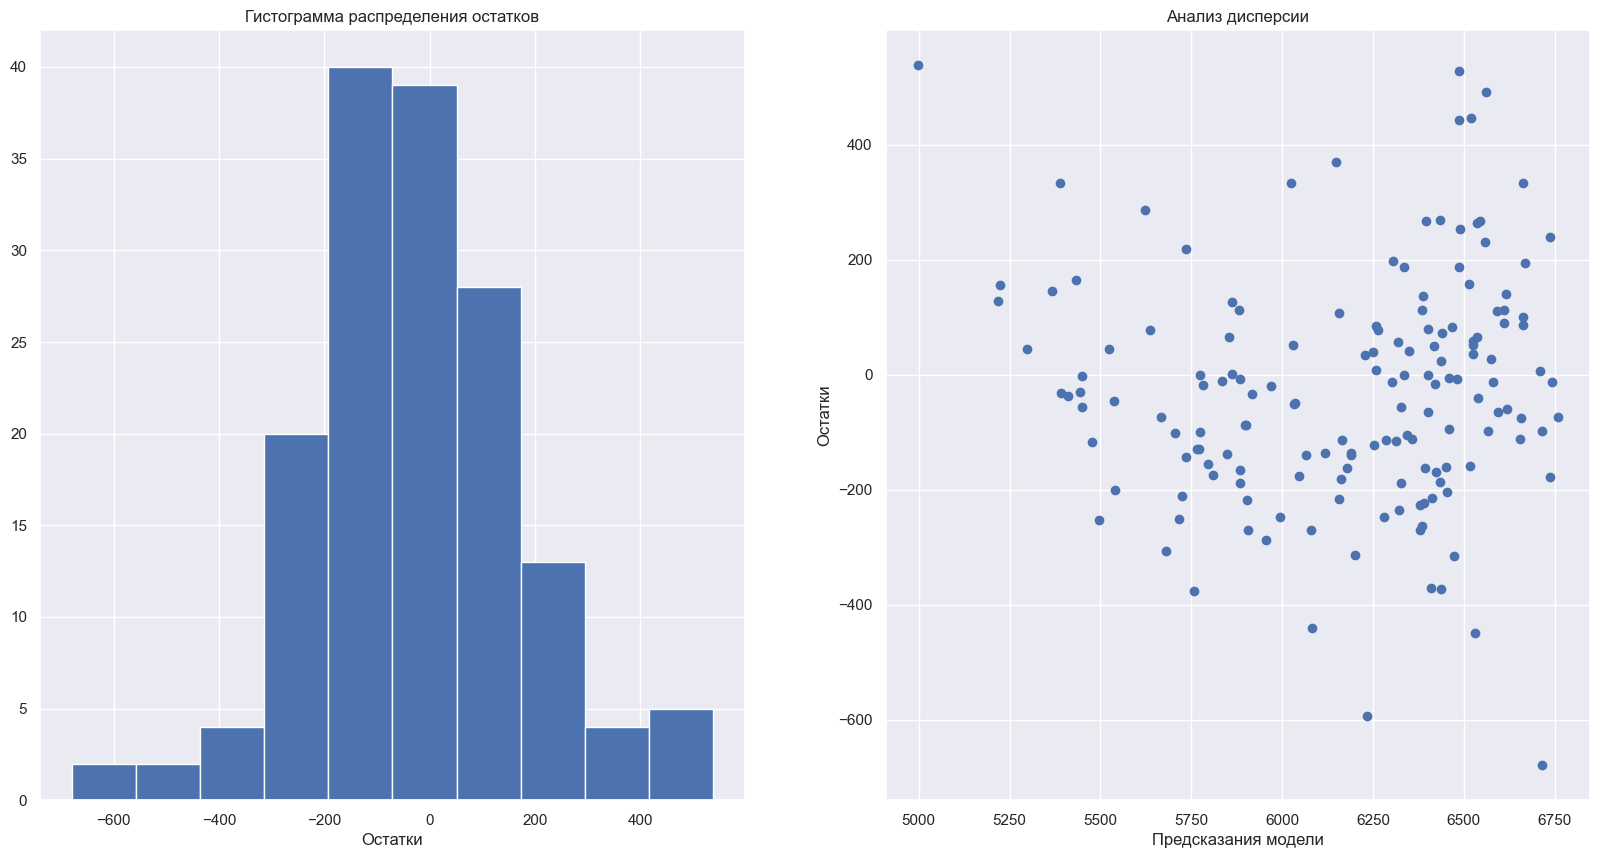

In [32]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Получили r2 равную 0.75, значит модель объясняет 75% вариации в данных.
Графики подтверждают теорию, и показывают эффективность модели.

Подготовим данные с учётом связи входных признаков с целевым

Разберем нелинейные связи с удоем

Видим явную границу между удоем и спо. Можем разделить данные на 2 категории и преобразовать в бинарный признак

In [33]:
corr_t = t.copy()
corr_t['SPO_bin'] = np.where((t['Удой, кг'] <= 6000) & (t['СПО (Сахаро-протеиновое соотношение)'] <= 0.9), 0, 1)
corr_t['SPO_bin'].value_counts()

SPO_bin
1    370
0    258
Name: count, dtype: int64

ЭКЕ и Удой тоже связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате

In [34]:
corr_t['EKE_sqr'] = t['ЭКЕ (Энергетическая кормовая единица)'] ** 2
corr_t['EKE_sqr']

0      201.64
1      163.84
2      196.00
3      153.76
4      163.84
        ...  
624    237.16
625    166.41
626    207.36
627    190.44
628    262.44
Name: EKE_sqr, Length: 628, dtype: float64

In [35]:
train_data = corr_t
X = train_data.drop('Удой, кг', axis=1)
y = train_data['Удой, кг']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
display(X_train)

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,SPO_bin,EKE_sqr
508,16.5,2123,0.940,РефлешнСоверинг,Холмистое,Соверин,3.70,3.074,вкусно,более_2_лет,1,272.25
383,12.5,1889,0.890,РефлешнСоверинг,Холмистое,Соверин,3.34,3.072,вкусно,менее_2_лет,0,156.25
587,14.7,1671,0.880,Вис Бик Айдиал,Равнинное,Айдиалл,3.18,3.079,не вкусно,более_2_лет,0,216.09
197,14.4,2063,0.940,Вис Бик Айдиал,Холмистое,Айдиалл,3.62,3.079,вкусно,более_2_лет,1,207.36
328,13.1,2077,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.64,3.076,вкусно,более_2_лет,0,171.61
...,...,...,...,...,...,...,...,...,...,...,...,...
72,13.7,2212,0.895,РефлешнСоверинг,Холмистое,Айдиалл,3.61,3.077,вкусно,более_2_лет,0,187.69
107,14.9,1742,0.930,Вис Бик Айдиал,Равнинное,Айдиалл,3.72,3.073,вкусно,более_2_лет,1,222.01
271,13.4,1775,0.880,РефлешнСоверинг,Равнинное,Айдиалл,3.63,3.071,вкусно,более_2_лет,0,179.56
436,13.1,1949,0.880,Вис Бик Айдиал,Равнинное,Айдиалл,3.61,3.075,не вкусно,более_2_лет,0,171.61


In [37]:
num_col_names= X_train.drop(['Возраст','SPO_bin', 'Вкус молока', 'порода папы_быка', 'Тип пастбища', 'Порода'],  axis=1).columns

cat_col_names = ['Возраст','SPO_bin', 'Вкус молока', 'порода папы_быка', 'Тип пастбища', 'Порода']


scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки
# сделайте это одной командой
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names =  encoder.get_feature_names_out()

In [38]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train.head(5))

   Возраст_менее_2_лет  SPO_bin_1  Вкус молока_не вкусно  \
0                  0.0        1.0                    0.0   
1                  1.0        0.0                    0.0   
2                  0.0        0.0                    1.0   
3                  0.0        1.0                    0.0   
4                  0.0        0.0                    0.0   

   порода папы_быка_Соверин  Тип пастбища_Холмистое  Порода_РефлешнСоверинг  \
0                       1.0                     1.0                     1.0   
1                       1.0                     1.0                     1.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     1.0                     0.0   
4                       0.0                     0.0                     0.0   

   ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0                               1.502378          1.079523   
1                              -1.557270

In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r = np.array(y_test)
r2 = r2_score(y_test,predictions)
print(f"Показатель r2 {r2}, mae {mean_absolute_error(y_test,predictions)}, mse {mean_squared_error(y_test,predictions)}, rmse {mean_squared_error(y_test,predictions)**0.5}")

Показатель r2 0.8178296782616664, mae 147.98213105850866, mse 37083.495077909385, rmse 192.57075343340532


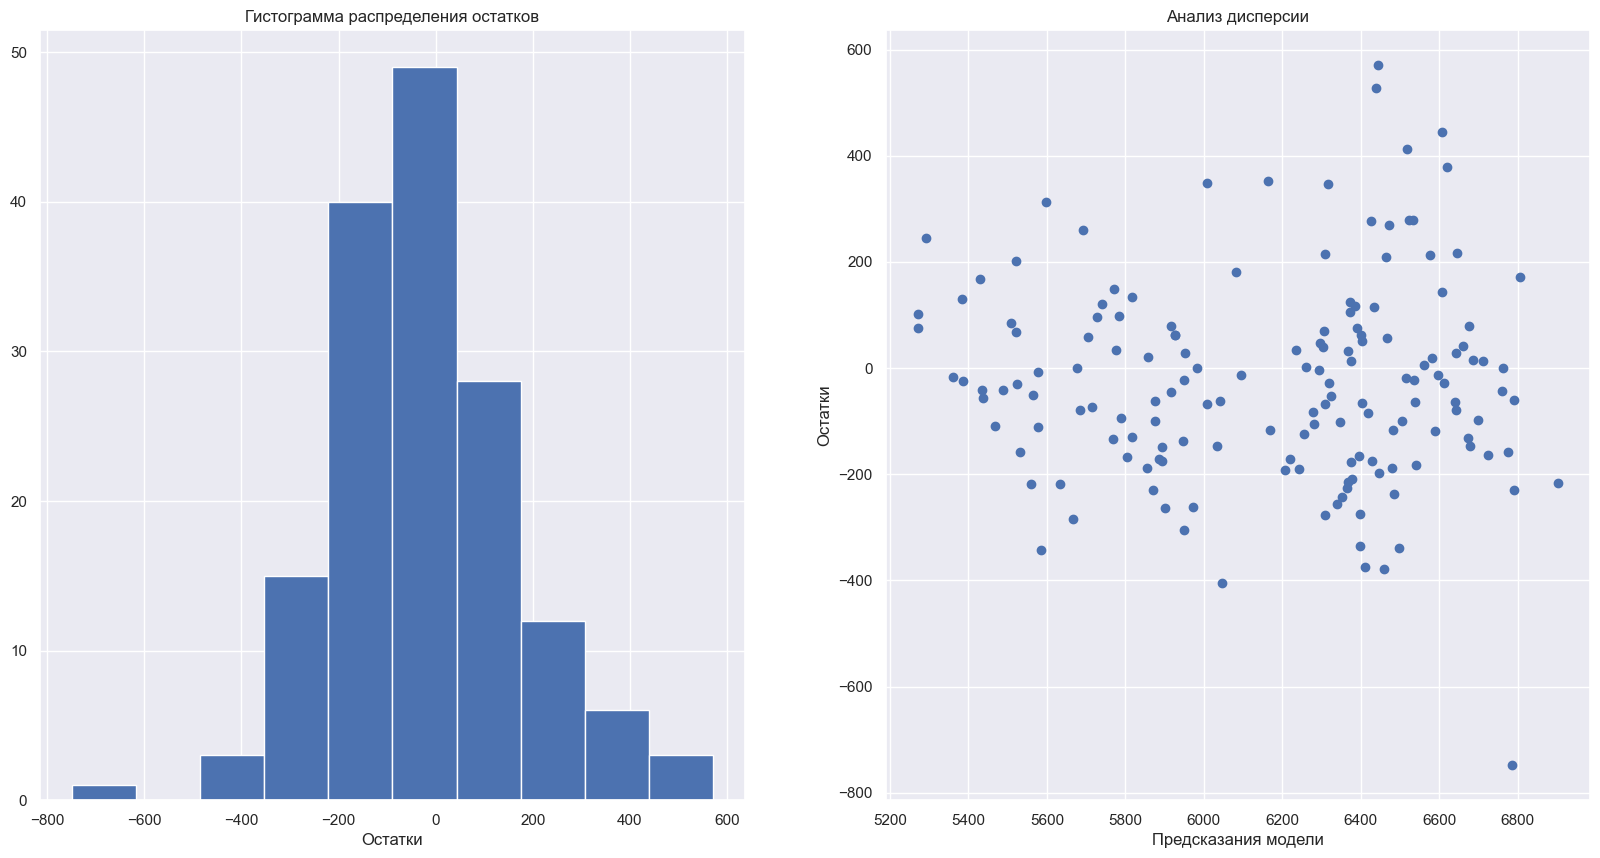

In [40]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [41]:
data_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиалл,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


In [42]:
dad_t = data_main.merge(data_dad, how='left', left_on='id', right_on='id')
dad_t['Имя Папы'].value_counts()
#dad_t = dad_t.replace(['Барин', 'Буйный', 'Соловчик', 'Геркулес'],[1, 2, 3, 4])

Имя Папы
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64

<Axes: xlabel='СПО (Сахаро-протеиновое соотношение)', ylabel='Удой, кг'>

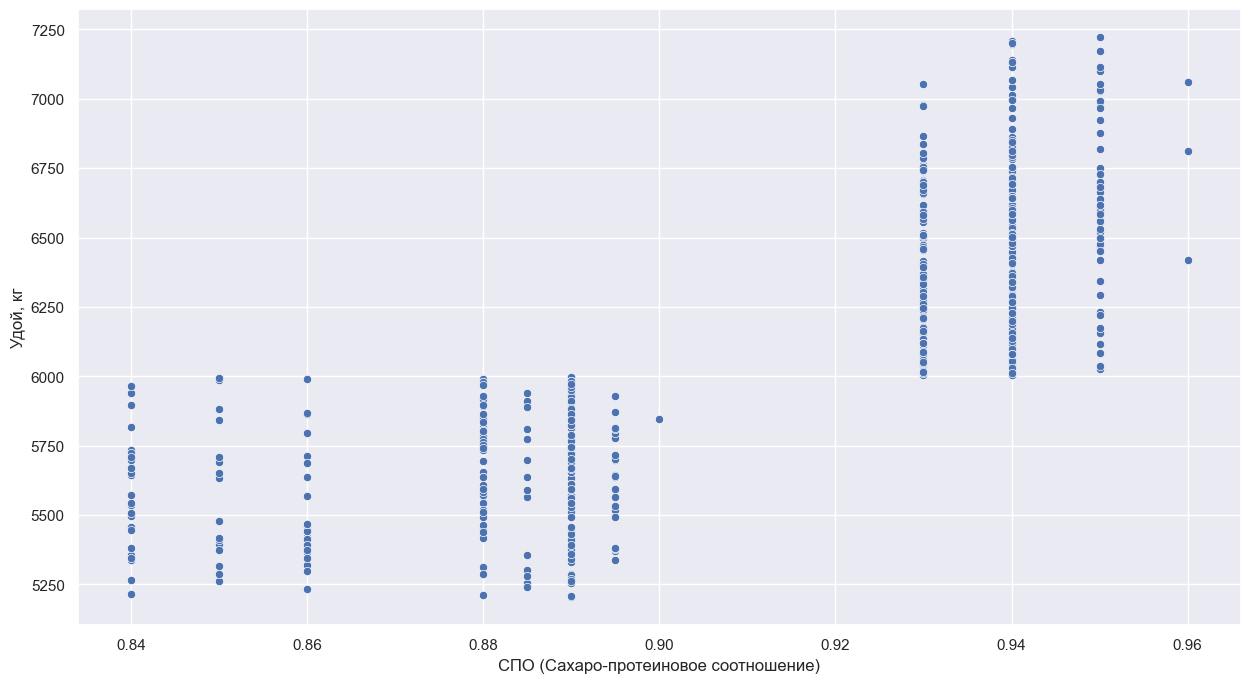

In [43]:
dad_t = dad_t[dad_t['Удой, кг'] < 8000]
sns.scatterplot(data=dad_t, x= 'СПО (Сахаро-протеиновое соотношение)', y= 'Удой, кг')

Из диаграммы рассеяния явно видим границу между кластерами значений. После spo=0.92-0.93, удой повышается до 6000-7000.
Именно эти границы мы используем для перевода столбца spo в бинарный тип.

In [44]:

corr_t = dad_t.copy()
corr_t['SPO_bin'] = np.where((t['Удой, кг'] <= 6000) & (t['СПО (Сахаро-протеиновое соотношение)'] <= 0.9), 0, 1)
corr_t['SPO_bin'].value_counts()

SPO_bin
1    370
0    258
Name: count, dtype: int64

In [45]:
corr_t['EKE_sqr'] = t['ЭКЕ (Энергетическая кормовая единица)'] ** 2
corr_t['EKE_sqr']

0      201.64
1      163.84
2      196.00
3      153.76
4      163.84
        ...  
624    237.16
625    166.41
626    207.36
627    190.44
628    262.44
Name: EKE_sqr, Length: 628, dtype: float64

In [46]:
corr_t.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст', 'Имя Папы', 'SPO_bin', 'EKE_sqr'],
      dtype='object')

In [47]:
train_data = corr_t.drop(['Вкус молока', 'id','ЭКЕ (Энергетическая кормовая единица)','СПО (Сахаро-протеиновое соотношение)'], axis=1)

X = train_data.drop('Удой, кг', axis=1)
y = train_data['Удой, кг']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
display(X_train)

,"Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы,SPO_bin,EKE_sqr
508,2123,РефлешнСоверинг,Холмистое,Соверин,3.70,3.074,более_2_лет,Соловчик,1,272.25
383,1889,РефлешнСоверинг,Холмистое,Соверин,3.34,3.072,менее_2_лет,Барин,0,156.25
587,1671,Вис Бик Айдиал,Равнинное,Айдиалл,3.18,3.079,более_2_лет,Буйный,0,216.09
197,2063,Вис Бик Айдиал,Холмистое,Айдиалл,3.62,3.079,более_2_лет,Буйный,1,207.36
328,2077,Вис Бик Айдиал,Равнинное,Айдиалл,3.64,3.076,более_2_лет,Геркулес,0,171.61
...,...,...,...,...,...,...,...,...,...,...
72,2212,РефлешнСоверинг,Холмистое,Айдиалл,3.61,3.077,более_2_лет,Барин,0,187.69
107,1742,Вис Бик Айдиал,Равнинное,Айдиалл,3.72,3.073,более_2_лет,Геркулес,1,222.01
271,1775,РефлешнСоверинг,Равнинное,Айдиалл,3.63,3.071,более_2_лет,Геркулес,0,179.56
436,1949,Вис Бик Айдиал,Равнинное,Айдиалл,3.61,3.075,более_2_лет,Буйный,0,171.61


In [49]:
num_col_names= X_train.drop(['Возраст','SPO_bin', 'порода папы_быка', 'Тип пастбища', 'Порода', 'Имя Папы'],  axis=1).columns

cat_col_names = ['Возраст','SPO_bin', 'порода папы_быка', 'Тип пастбища', 'Порода', 'Имя Папы']


scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки
# сделайте это одной командой
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names =  encoder.get_feature_names_out()

In [50]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train.head(5))

   Возраст_менее_2_лет  SPO_bin_1  порода папы_быка_Соверин  \
0                  0.0        1.0                       1.0   
1                  1.0        0.0                       1.0   
2                  0.0        0.0                       0.0   
3                  0.0        1.0                       0.0   
4                  0.0        0.0                       0.0   

   Тип пастбища_Холмистое  Порода_РефлешнСоверинг  Имя Папы_Буйный  \
0                     1.0                     1.0              0.0   
1                     1.0                     1.0              0.0   
2                     0.0                     0.0              1.0   
3                     1.0                     0.0              1.0   
4                     0.0                     0.0              0.0   

   Имя Папы_Геркулес  Имя Папы_Соловчик  Сырой протеин, г  Жирность,%  \
0                0.0                1.0          1.079523    0.562532   
1                0.0                0.0         -0.196

In [51]:
model_lr3 = LinearRegression()
model_lr3.fit(X_train, y_train)
display(X_test)
predictions = model_lr3.predict(X_test)
r = np.array(y_test)
r2 = r2_score(y_test,predictions)
print(f"Показатель r2 {r2}, mae {mean_absolute_error(y_test,predictions)}, mse {mean_squared_error(y_test,predictions)}, rmse {mean_squared_error(y_test,predictions)**0.5}")

,Возраст_менее_2_лет,SPO_bin_1,порода папы_быка_Соверин,Тип пастбища_Холмистое,Порода_РефлешнСоверинг,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик,"Сырой протеин, г","Жирность,%","Белок,%",EKE_sqr
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.813322,0.201807,0.094429,-0.527089
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.026730,0.622652,-1.065819,1.490346
2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.682405,0.141686,0.094429,-0.527089
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.058792,0.081565,-0.679069,-0.961737
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.413360,0.081565,0.094429,0.561660
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.506760,0.682773,-2.226067,1.754809
153,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.714046,-2.323267,-0.679069,0.643423
154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.114008,0.201807,0.481179,0.561660
155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.415116,-0.760126,-1.065819,0.239936


Показатель r2 0.8241599611957291, mae 144.78291620817907, mse 35794.871257151804, rmse 189.19532567468946


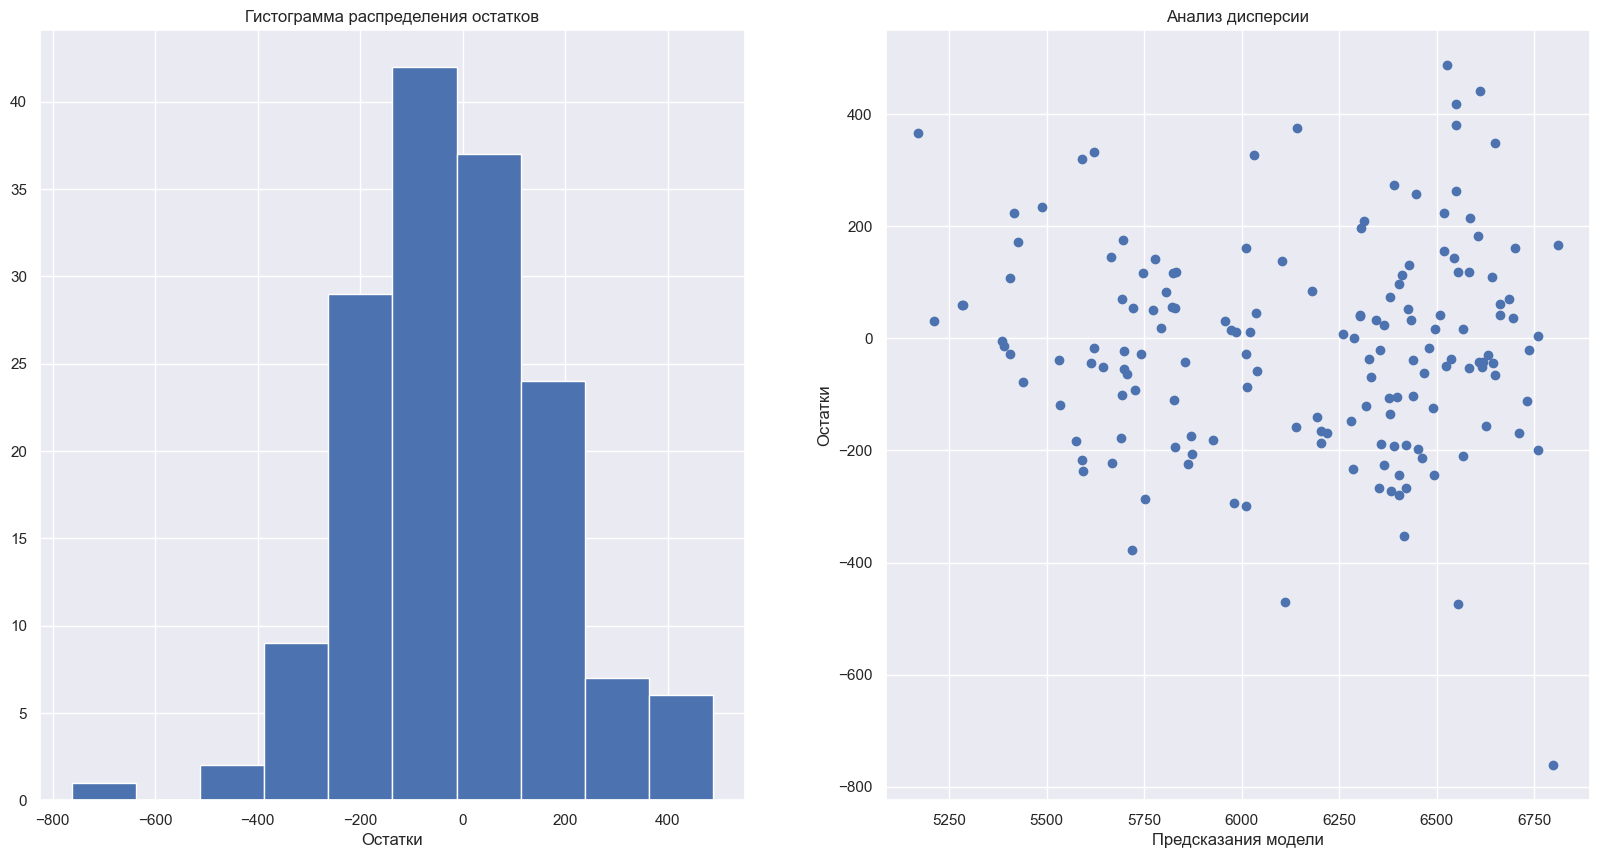

In [52]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

После обучения и визуализации эффективностей 3 моделей, можем сделать вывод, что 2 модель самая эффективная.(r2 = 0.83, распределение остатков лучшее)

### Предсказания на cow_buy

In [53]:
data_cow

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


In [54]:
data_cow[['EKE_sqr', 'SPO_bin', 'Сырой протеин, г']] = data_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']].median() * 1.05

C:\Users\artem\AppData\Local\Temp\ipykernel_7000\2156648720.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_cow[['EKE_sqr', 'SPO_bin', 'Сырой протеин, г']] = data_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']].median() * 1.05
C:\Users\artem\AppData\Local\Temp\ipykernel_7000\2156648720.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_cow[['EKE_sqr', 'SPO_bin', 'Сырой протеин, г']] = data_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']].median() * 1.05
C:\Users\artem\AppData\Local\Tem

In [55]:
data_cow

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,EKE_sqr,SPO_bin,"Сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,0.9765,1982.4
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,0.9765,1982.4
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,0.9765,1982.4
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.435,0.9765,1982.4
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,0.9765,1982.4
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.435,0.9765,1982.4
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.435,0.9765,1982.4
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.435,0.9765,1982.4


In [56]:
data_cow['EKE_sqr'] = data_cow['EKE_sqr'] ** 2
data_cow['SPO_bin'] = np.where((data_cow['SPO_bin'] <= 0.9), 0, 1)
data_cow['SPO_bin'].iloc[-1] = 0
data_cow

C:\Users\artem\AppData\Local\Temp\ipykernel_7000\2286861883.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cow['SPO_bin'].iloc[-1] = 0
C:\Users\artem\AppData\Local\Temp\ipykernel_7000\2286861883.py:3: SettingWithCopyWarning: 
A val

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,EKE_sqr,SPO_bin,"Сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,238.239225,1,1982.4
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,238.239225,1,1982.4
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,238.239225,1,1982.4
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,238.239225,1,1982.4
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,238.239225,1,1982.4
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,238.239225,1,1982.4
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,238.239225,1,1982.4
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,238.239225,1,1982.4
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,238.239225,1,1982.4
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,238.239225,1,1982.4


In [57]:
X_train = data_cow

num_col_names= X_train.drop(['Возраст','SPO_bin', 'порода папы_быка', 'Тип пастбища', 'Порода', 'Имя_папы'],  axis=1).columns

cat_col_names = ['Возраст','SPO_bin', 'порода папы_быка', 'Тип пастбища', 'Порода', 'Имя_папы']

scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки
# сделайте это одной командой
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

encoder = OneHotEncoder(drop='first')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
encoder_col_names =  encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
print(X_train.head(5))

   Возраст_менее_2_лет  SPO_bin_1  порода папы_быка_Соверин  \
0                  0.0        1.0                       0.0   
1                  1.0        1.0                       1.0   
2                  0.0        1.0                       1.0   
3                  0.0        1.0                       0.0   
4                  0.0        1.0                       0.0   

   Тип пастбища_холмистое  Порода_РефлешнСоверинг  Имя_папы_Буйный  \
0                     1.0                     0.0              0.0   
1                     0.0                     0.0              1.0   
2                     0.0                     1.0              0.0   
3                     1.0                     1.0              1.0   
4                     0.0                     1.0              1.0   

   Имя_папы_Геркулес  Имя_папы_Соловчик  Текущая_жирность,%  \
0                1.0                0.0            0.059253   
1                0.0                0.0           -0.232455   
2          

#### Проблема в том, что в датафрейм data_cow, столбец с SPO мы записываем как медианное значение по data_main. Но это исключает возможность перевести столбец в бинарный вид, что и вскрывается на моменте с трансформацией. 

<div class="alert alert-info"> <b>Пришлось делать через костыль(изменил в столбце spo последнюю единицу на 0)
    при кодировании столбец с константой 1 пропадал и модель опять не предсказывала:</b> </div>

In [58]:
#model_lr3.predict(X_train)
#data_cow['удой прогноз'] = model_lr3.predict(X_train)
#data_cow

## Обучение модели логистической регрессии

In [59]:
corr_t.drop(['Вкус молока', 'id','ЭКЕ (Энергетическая кормовая единица)','СПО (Сахаро-протеиновое соотношение)'], axis=1)

,"Удой, кг","Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы,SPO_bin,EKE_sqr
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин,0,163.84
...,...,...,...,...,...,...,...,...,...,...,...
624,6812,1964,РефлешнСоверинг,Равнинное,Айдиалл,3.74,3.075,более_2_лет,Буйный,1,237.16
625,5513,1700,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет,Барин,0,166.41
626,5970,1837,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,более_2_лет,Барин,0,207.36
627,5746,1994,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,более_2_лет,Барин,0,190.44


In [60]:
train_data = corr_t.drop(['id','ЭКЕ (Энергетическая кормовая единица)','СПО (Сахаро-протеиновое соотношение)'], axis=1)
X = train_data.drop('Вкус молока', axis=1)
y = train_data['Вкус молока']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
display(X_train)

,"Удой, кг","Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы,SPO_bin,EKE_sqr
508,6498,2123,РефлешнСоверинг,Холмистое,Соверин,3.70,3.074,более_2_лет,Соловчик,1,272.25
383,5268,1889,РефлешнСоверинг,Холмистое,Соверин,3.34,3.072,менее_2_лет,Барин,0,156.25
587,5610,1671,Вис Бик Айдиал,Равнинное,Айдиалл,3.18,3.079,более_2_лет,Буйный,0,216.09
197,6343,2063,Вис Бик Айдиал,Холмистое,Айдиалл,3.62,3.079,более_2_лет,Буйный,1,207.36
328,5833,2077,Вис Бик Айдиал,Равнинное,Айдиалл,3.64,3.076,более_2_лет,Геркулес,0,171.61
...,...,...,...,...,...,...,...,...,...,...,...
72,5718,2212,РефлешнСоверинг,Холмистое,Айдиалл,3.61,3.077,более_2_лет,Барин,0,187.69
107,6392,1742,Вис Бик Айдиал,Равнинное,Айдиалл,3.72,3.073,более_2_лет,Геркулес,1,222.01
271,5971,1775,РефлешнСоверинг,Равнинное,Айдиалл,3.63,3.071,более_2_лет,Геркулес,0,179.56
436,5858,1949,Вис Бик Айдиал,Равнинное,Айдиалл,3.61,3.075,более_2_лет,Буйный,0,171.61


In [62]:
num_col_names= X_train.drop(['Возраст','Порода', 'порода папы_быка', 'Тип пастбища', 'Имя Папы'],  axis=1).columns

cat_col_names = ['Возраст','Порода', 'порода папы_быка', 'Тип пастбища', 'Имя Папы']


scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки
# сделайте это одной командой
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names =  encoder.get_feature_names_out()

In [63]:
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train.head(5))

   Возраст_менее_2_лет  Порода_РефлешнСоверинг  порода папы_быка_Соверин  \
0                  0.0                     1.0                       1.0   
1                  1.0                     1.0                       1.0   
2                  0.0                     0.0                       0.0   
3                  0.0                     0.0                       0.0   
4                  0.0                     0.0                       0.0   

   Тип пастбища_Холмистое  Имя Папы_Буйный  Имя Папы_Геркулес  \
0                     1.0              0.0                0.0   
1                     1.0              0.0                0.0   
2                     0.0              1.0                0.0   
3                     1.0              1.0                0.0   
4                     0.0              0.0                1.0   

   Имя Папы_Соловчик  Удой, кг  Сырой протеин, г  Жирность,%   Белок,%  \
0                1.0  0.780768          1.079523    0.562532 -0.679069   
1   

recall:  0.864
precision:  0.623
accuracy:  0.631


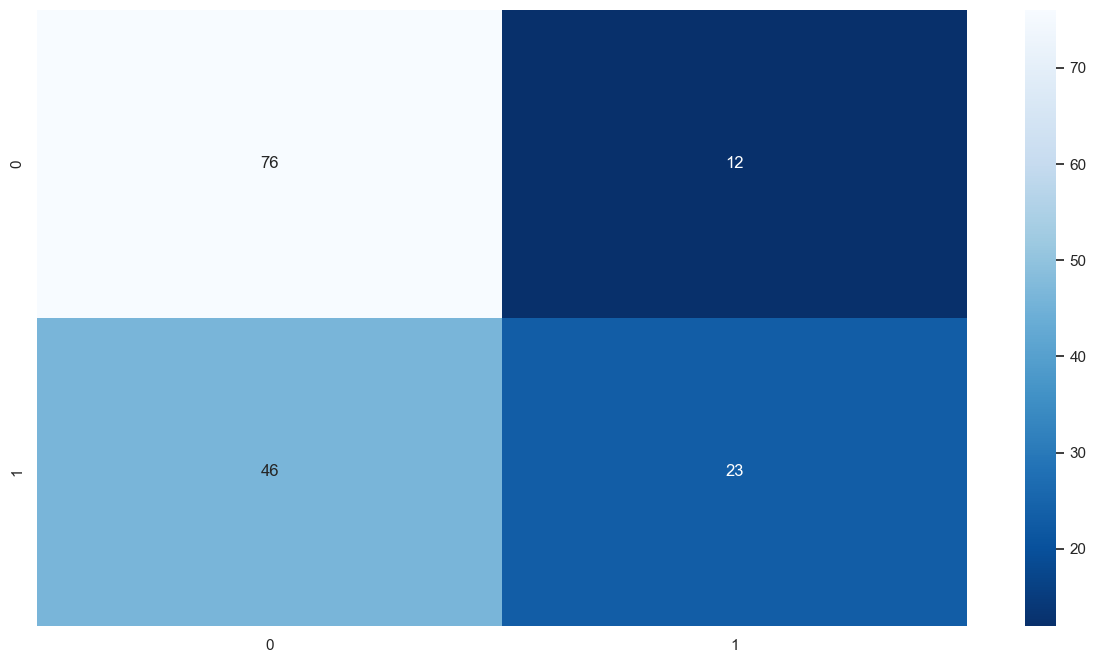

In [64]:
clf = LogisticRegression()

# настраиваем модель на данные
clf = clf.fit(X_train, y_train)

# получаем прогнозные значения
y_pred = clf.predict(X_test) 

recall = recall_score(y_test,y_pred, pos_label='вкусно')
precision = precision_score(y_test,y_pred, pos_label='вкусно')
accuracy = accuracy_score(y_test,y_pred)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
print('accuracy: ',round(accuracy,3))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [65]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

       y_valid   y_proba
84   не вкусно  0.753377
47   не вкусно  0.724243
141  не вкусно  0.714739
119  не вкусно  0.688263
46   не вкусно  0.677825


In [66]:
thresholds = [round(i,2) for i in np.linspace(0.1,0.32,num = 4,endpoint=False)]
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x < i else 1 )

# выведем 5 случайных строк
print(data.sample(5))

       y_valid   y_proba  y_pred_0.1  y_pred_0.16  y_pred_0.21  y_pred_0.26
80   не вкусно  0.233374           1            1            1            0
97      вкусно  0.654696           1            1            1            1
148  не вкусно  0.399405           1            1            1            1
50      вкусно  0.406331           1            1            1            1
48      вкусно  0.456344           1            1            1            1


Важнее всего будет метрика recall

Также установим пороговое значение в 0.3

### Прогноз вкуса молока

In [67]:
print("Имена признаков при обучении модели:", clf.feature_names_in_)
print("Имена признаков в X_train:", X_train.columns.tolist())


Имена признаков при обучении модели: ['Возраст_менее_2_лет' 'Порода_РефлешнСоверинг' 'порода папы_быка_Соверин'
 'Тип пастбища_Холмистое' 'Имя Папы_Буйный' 'Имя Папы_Геркулес'
 'Имя Папы_Соловчик' 'Удой, кг' 'Сырой протеин, г' 'Жирность,%' 'Белок,%'
 'SPO_bin' 'EKE_sqr']
Имена признаков в X_train: ['Возраст_менее_2_лет', 'Порода_РефлешнСоверинг', 'порода папы_быка_Соверин', 'Тип пастбища_Холмистое', 'Имя Папы_Буйный', 'Имя Папы_Геркулес', 'Имя Папы_Соловчик', 'Удой, кг', 'Сырой протеин, г', 'Жирность,%', 'Белок,%', 'SPO_bin', 'EKE_sqr']


In [69]:
X_train_scaled

,"Текущая_жирность,%","Текущий_уровень_белок,%",EKE_sqr,SPO_bin,"Сырой протеин, г"
0,0.059253,0.710628,0.0,0.258199,0.0
1,-0.232455,1.169098,0.0,0.258199,0.0
2,0.132181,0.527240,0.0,0.258199,0.0
3,-1.253436,-0.664781,0.0,0.258199,0.0
4,0.496816,0.527240,0.0,0.258199,0.0
5,0.423889,-1.398332,0.0,0.258199,0.0
6,-0.013674,0.985710,0.0,0.258199,0.0
7,-1.253436,0.985710,0.0,0.258199,0.0
8,1.153161,-1.214945,0.0,0.258199,0.0
9,1.153161,0.435546,0.0,0.258199,0.0


In [71]:
data_cow
num_col_names= data_cow.drop(['Возраст','Порода', 'порода папы_быка', 'Тип пастбища', 'Имя_папы'],  axis=1).columns
cat_col_names = ['Возраст','Порода', 'порода папы_быка', 'Тип пастбища', 'Имя_папы']


scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки
# сделайте это одной командой
X_train_scaled = scaler.fit_transform(data_cow[num_col_names])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(data_cow[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names =  encoder.get_feature_names_out()
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

# Переименовываем столбцы в X_train
X_train_ohe.columns = [
    'Возраст_менее_2_лет', 
    'Порода_РефлешнСоверинг', 
    'порода папы_быка_Соверин', 
    'Тип пастбища_Холмистое', 
    'Имя Папы_Буйный', 
    'Имя Папы_Геркулес', 
    'Имя Папы_Соловчик'
]

X_train_scaled.columns = [ 
    'Сырой протеин, г', 
    'Жирность,%', 
    'Белок,%', 
    'SPO_bin', 
    'EKE_sqr'
]

# Объединяем все данные в единый DataFrame
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)

# Упорядочиваем столбцы в соответствии с порядком, который модель видела при обучении
X_train = X_train[['Возраст_менее_2_лет', 'Порода_РефлешнСоверинг', 
                   'порода папы_быка_Соверин', 'Тип пастбища_Холмистое', 
                   'Имя Папы_Буйный', 'Имя Папы_Геркулес', 'Имя Папы_Соловчик', 
                   'Сырой протеин, г', 'Жирность,%', 'Белок,%', 
                   'SPO_bin', 'EKE_sqr']]

# Предсказание
y_pred = clf.predict(X_train)

# Добавляем прогноз в DataFrame
data_cow['вкус_молока_прогноз'] = y_pred
data_cow


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Удой, кг


## Итоговые выводы

In [ ]:
display(data_cow.query("удой_прогноз > 6000 & вкус_молока_прогноз == 'вкусно'"))

Над проектом была проделана работа:

1- Провели предобработку данных(удалили выбросы, дубликаты)

2- Провели исследовательский анализ данных, посмотрели распределение в столбцах основного датафрейма, изучили корреляцию между всеми признаками.(и целевым признаком, особенно). Также отобразили на диаграммах рассеяния и породу каждой особи.

3- Обучили 3 модели линейной регрессии. Для каждой использовали разный входной набор данных, и лучше всех себя показала 3 модель, в которую мы передавали признак "Имя Папы", устранили нелинейность между признаками и закодировали/массштабировали данные. Также оценивали точность моделей по метрикам R²,mae, mse, rmse и проанализировали остатки с помощью графиков.

(1 модель: Показатель r2 0.797, mae 156.78, mse 41277.95, rmse 203.17)

(2 модель: Показатель r2 0.818, mae 147.98, mse 37083.50, rmse 192.57)

(3 модель: Показатель r2 0.824, mae 144.8, mse 35794.87, rmse 189.20)

4- С помощью 3 модели получили предсказания по Удою коров и добавили соответствующий столбец в таблицу.

5- Обучили модель логической регрессии для предсказания Вкуса молока. Оценили качество модели на тестовой выборке: рассчитали метрики accuracy, recall, precision. После построния матрицы ошибок, подобрали нужный порог и после сделали предсказание по целевому признаку и добавили соответствующий столбец к таблице.

В результате, фермеру могу дать рекомендацию покупать именно этих коров. С минимальным риском можно взять коров с возрастом менее 2 лет, ведь обычно с возрастом удой увеличивается.

Для улучшения результатов регрессионой модели,можно также использовать метод перекрестной проверки, а также подбор луших гиперпараметров.

Многие важные метрики мы уже задействовали, также можно добавить mape/mase, что являются близким к mae/mse. Для логической регрессии можно добавить: F-меру
